In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\yasar\OneDrive\Desktop\360 digitmg\Dataset\dataset_Copy.csv")

In [4]:
data.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6-1-2022,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [5]:
data.shape

(14218, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


# PREPROCESSING

In [7]:
cleaned = data.copy()

In [8]:
## Changing text to datetime data type
cleaned['Dateofbill'] = pd.to_datetime(cleaned['Dateofbill'])

In [9]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     14218 non-null  object        
 1   Patient_ID      14218 non-null  int64         
 2   Specialisation  14218 non-null  object        
 3   Dept            14218 non-null  object        
 4   Dateofbill      14218 non-null  datetime64[ns]
 5   Quantity        14218 non-null  int64         
 6   ReturnQuantity  14218 non-null  int64         
 7   Final_Cost      14218 non-null  float64       
 8   Final_Sales     14218 non-null  float64       
 9   RtnMRP          14218 non-null  float64       
 10  Formulation     13565 non-null  object        
 11  DrugName        12550 non-null  object        
 12  SubCat          12550 non-null  object        
 13  SubCat1         12526 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)


In [93]:
cleaned.shape

(14192, 14)

In [10]:
cleaned.head(3)

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-06-01,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM


In [11]:
## Checking for any null values
cleaned.isna().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64

In [12]:
## Replacing null with 'unknown'
cleaned.fillna('Unknown', inplace = True)

In [13]:
cleaned.isna().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [14]:
cleaned.shape

(14218, 14)

In [15]:
sale_count = cleaned[cleaned['Typeofsales'] == 'Sale']['Typeofsales'].count()
print("Total sale count : ", sale_count)

Total sale count :  12537


In [16]:
return_count = cleaned[cleaned['Typeofsales'] == 'Return']['Typeofsales'].count()
print("Total Return count : ", return_count)

Total Return count :  1681


In [17]:
## Checking for any duplicates in the dataset
total_duplicates = cleaned.duplicated().sum()
total_duplicates

26

In [18]:
duplicates = cleaned[cleaned.duplicated()]
duplicates

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
2706,Sale,12018107758,Specialisation8,Department1,2022-09-25,1,0,1352.500,1602.800,0.000,Form1,LIPOSOMAL AMPHOTERICIN B 50MG INJ,INJECTIONS,ANTI-INFECTIVES
4444,Sale,12018091924,Specialisation4,Department1,2022-04-29,1,0,46.720,94.120,0.000,Form1,ESOMEPRAZOLE 40MG,INJECTIONS,GASTROINTESTINAL & HEPATOBILIARY SYSTEM
4509,Sale,12018073408,Specialisation4,Department1,2022-02-03,2,0,196.800,1980.076,0.000,Form2,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES
5539,Sale,12018111400,Specialisation7,Department1,2022-10-25,2,0,47.754,104.204,0.000,Form1,CEFTRIAXONE 1GM,INJECTIONS,ANTI-INFECTIVES
6254,Sale,12018101171,Specialisation4,Department1,2022-08-04,1,0,52.224,59.846,0.000,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
6499,Sale,12018036747,Specialisation7,Department1,2022-06-29,2,0,63.700,109.680,0.000,Form1,DEXTROSE 5% W/V IV FLUID,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
6731,Return,12018104215,Specialisation1,Department1,2022-07-21,0,1,52.588,0.000,91.600,Unknown,Unknown,Unknown,Unknown
7664,Sale,12018098932,Specialisation8,Department1,2022-07-08,1,0,49.352,60.800,0.000,Form1,Unknown,Unknown,Unknown
7950,Sale,12017999409,Specialisation31,Department1,2022-02-04,3,0,68.056,182.400,0.000,Form1,Unknown,Unknown,Unknown
7968,Sale,12018075690,Specialisation4,Department1,2022-03-05,1,0,233.824,309.200,0.000,Form1,NUTRITIONAL SUPPLEMENT POWDER,NUTRITIONAL SUPPLEMENTS,Unknown


In [19]:
## Removing all the duplicates
cleaned.drop_duplicates(inplace = True)

In [20]:
cleaned.shape

(14192, 14)

In [21]:
cleaned.duplicated().sum()

0

In [22]:
cleaned.columns

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')

In [23]:
columns = ['Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP']
def histogram(cleaned):
    n_cols = 5
    n_rows = (len(columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (12, 4))
    fig.suptitle('Histogram for all the columns')

    axes = axes.flatten()

    for i, col in enumerate(columns):
        cleaned[col].hist(ax = axes[i], bins = 10, alpha = 0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    for ax in axes[len(columns):]:
        ax.set_visible(False)
    
    plt.tight_layout()

    plt.show()

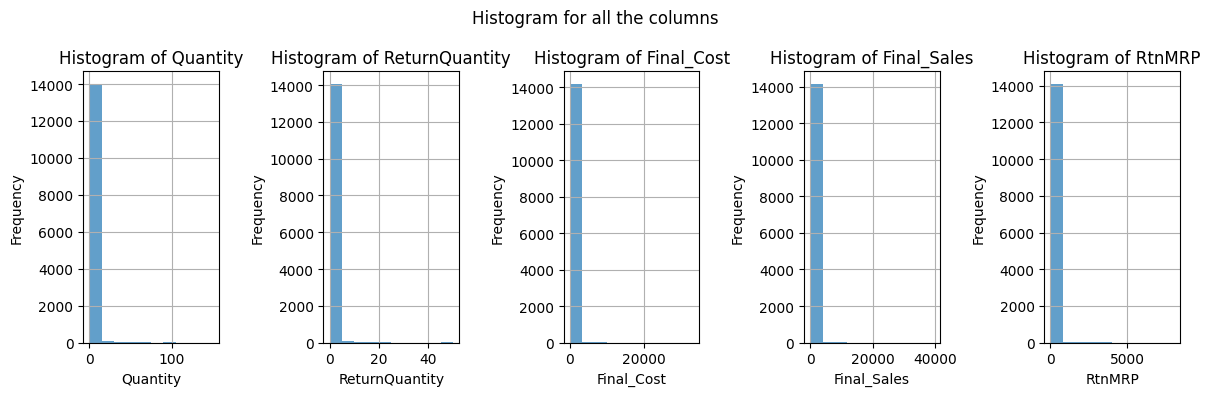

In [24]:
histogram(cleaned)

In [25]:
## Removing outliers 

def outlier_remover(df):
    for i in columns:
        x_bar = df[i].mean()
        sigma = df[i].std()
        df = df[(df[i]>(x_bar-3*sigma)) & (df[i]<(x_bar+3*sigma))]
    return df

In [26]:
## creating a new data frame without outliers
cleaned_outliers = outlier_remover(cleaned)

In [94]:
cleaned_outliers.shape

(13291, 15)

In [28]:
histogram(cleaned_1)

NameError: name 'cleaned_1' is not defined

In [ ]:
cleaned_outliers.info()

Text(0, 0.5, 'Final sales')

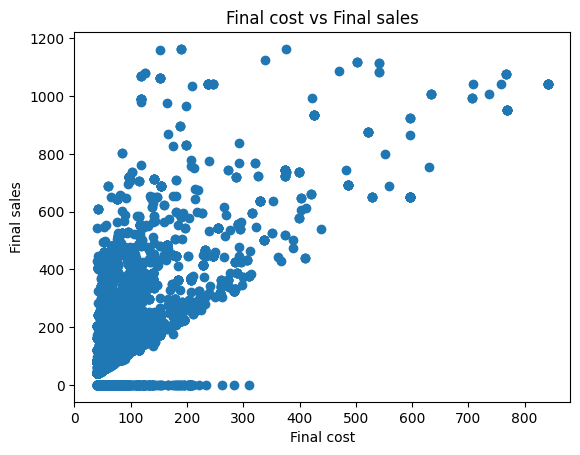

In [29]:
plt.scatter(cleaned_outliers['Final_Cost'], cleaned_outliers['Final_Sales'])
plt.title('Final cost vs Final sales')
plt.xlabel('Final cost')
plt.ylabel('Final sales')

Text(0, 0.5, 'Final sales')

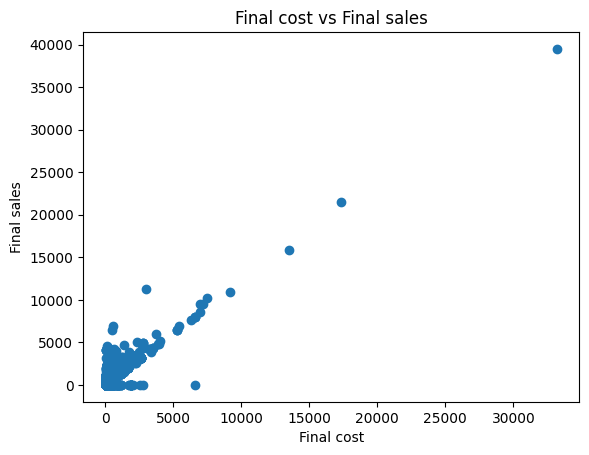

In [30]:
plt.scatter(data['Final_Cost'], data['Final_Sales'])
plt.title('Final cost vs Final sales')
plt.xlabel('Final cost')
plt.ylabel('Final sales')

# EDA (Exploratory Data Analysis)

In [31]:
## Top 5 regular patients
cleaned_outliers['Patient_ID'].value_counts().head(5)

12018071649    40
12018097835    39
12018085615    35
12018075690    32
12018064444    30
Name: Patient_ID, dtype: int64

In [32]:
cleaned_outliers[cleaned_outliers['Typeofsales'] == 'Return']['Patient_ID'].value_counts()

12018096209    6
12018086231    6
12018073236    4
12018097199    4
12018109053    4
              ..
12018091932    1
12018117689    1
12018081021    1
12018098114    1
12018075839    1
Name: Patient_ID, Length: 1127, dtype: int64

In [33]:
cleaned_outliers[(cleaned_outliers['Patient_ID'] == 12018096209) & (cleaned_outliers['Typeofsales'] == 'Return')]

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
6303,Return,12018096209,Specialisation4,Department1,2022-10-10,0,1,61.292,0.0,69.574,Form1,LANSOPRAZOLE 15MG TAB,TABLETS & CAPSULES,GASTROINTESTINAL & HEPATOBILIARY SYSTEM
7417,Return,12018096209,Specialisation4,Department1,2022-10-04,0,1,96.070,0.0,125.450,Form1,DALTEPARIN SODIUM 2500IU INJ,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7961,Return,12018096209,Specialisation4,Department1,2022-10-10,0,1,64.864,0.0,96.800,Unknown,MULTIPLE ELECTROLYTES 500ML IVF,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
9681,Return,12018096209,Specialisation4,Department1,2022-09-24,0,1,42.832,0.0,43.540,Form2,HEPARIN10IU + SODIUM CHLORIDE + BENZYL ALCOHO...,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
12049,Return,12018096209,Specialisation5,Department1,2022-07-05,0,1,46.552,0.0,46.306,Unknown,DEXTROSE 10%W/V 500ML IVF,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
12260,Return,12018096209,Specialisation5,Department1,2022-08-06,0,3,61.436,0.0,145.200,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS


In [34]:
cleaned_outliers['Typeofsales'].value_counts()

Sale      11845
Return     1446
Name: Typeofsales, dtype: int64

In [35]:
## Top 5 specialisations with most occurances
cleaned_outliers['Specialisation'].value_counts().head(5)

Specialisation4    3579
Specialisation7    1854
Specialisation3     709
Specialisation2     595
Specialisation8     543
Name: Specialisation, dtype: int64

In [36]:
cleaned_outliers['Dept'].value_counts()

Department1    11568
Department2     1525
Department3      198
Name: Dept, dtype: int64

In [37]:
cleaned_outliers['Formulation'].value_counts()

Form1      11084
Form2       1253
Unknown      552
Patent       337
Form3         65
Name: Formulation, dtype: int64

In [38]:
cleaned_outliers['DrugName'].value_counts().head(5)

Unknown                            1488
SODIUM CHLORIDE IVF 100ML           602
SODIUM CHLORIDE 0.9%                524
MULTIPLE ELECTROLYTES 500ML IVF     465
PANTOPRAZOLE 40MG INJ               441
Name: DrugName, dtype: int64

In [39]:
cleaned_outliers['SubCat'].value_counts()

INJECTIONS                      6012
IV FLUIDS, ELECTROLYTES, TPN    2509
TABLETS & CAPSULES              1493
Unknown                         1488
INHALERS & RESPULES              458
OINTMENTS, CREAMS & GELS         364
SYRUP & SUSPENSION               236
LIQUIDS & SOLUTIONS              233
POWDER                           214
NUTRITIONAL SUPPLEMENTS          125
PESSARIES & SUPPOSITORIES         55
DROPS                             53
VACCINE                           19
SPRAY                             12
PATCH                             11
LOTIONS                            5
SOLUTION                           3
SACHETS                            1
Name: SubCat, dtype: int64

In [40]:
cleaned_outliers['SubCat1'].value_counts()

INTRAVENOUS & OTHER STERILE SOLUTIONS                                 2959
GASTROINTESTINAL & HEPATOBILIARY SYSTEM                               1734
Unknown                                                               1511
CARDIOVASCULAR & HEMATOPOIETIC SYSTEM                                 1441
ANTI-INFECTIVES                                                       1295
CENTRAL NERVOUS SYSTEM                                                1247
RESPIRATORY SYSTEM                                                     572
ANAESTHETICS                                                           553
NUTRITION                                                              331
MUSCULO-SKELETAL SYSTEM                                                314
VITAMINS & MINERALS                                                    300
HORMONES                                                               277
IMMUNOLOGY                                                             177
ENDOCRINE & METABOLIC SYS

In [41]:
cleaned_outliers.columns

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')

In [42]:
cleaned_outliers[(cleaned_outliers['Final_Sales'] != 0) & (cleaned_outliers['Typeofsales'] == 'Return')].shape

(0, 14)

# Statistical insights

In [43]:
columns = ['Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP']
def desc_stats(data):
    for i in columns:
        print(i)
        print('------------------------------------------------------------------')
        print("Measures of central tendancy")
        print()
        mean = data[i].mean()
        median = data[i].median()
        mode = data[i].value_counts().index.tolist()[0]
        print('Mean : ', mean)
        print('Median : ', median)
        print('Mode : ', mode)
        print()
        
        print("Measures of dispersion")
        print()
        standard_deviation = data[i].std()
        variance = data[i].var()
        Range = data[i].max() - data[i].min()
        print('Standard deviation : ', standard_deviation)
        print('Variance : ', variance)
        print('Range : ', Range)
        
        skewness = (3 * (mean - median))/standard_deviation
        kurtosis = data[i].kurtosis()
        print('Skewness : ', skewness)
        print('Kurtosis : ', kurtosis)
        print()

In [44]:
desc_stats(cleaned_outliers)

Quantity
------------------------------------------------------------------
Measures of central tendancy

Mean :  1.7793995937100293
Median :  1.0
Mode :  1

Measures of dispersion

Standard deviation :  1.7955550755271514
Variance :  3.2240180292513148
Range :  15
Skewness :  1.302215015846074
Kurtosis :  11.710676037581983

ReturnQuantity
------------------------------------------------------------------
Measures of central tendancy

Mean :  0.18185238131066134
Median :  0.0
Mode :  0

Measures of dispersion

Standard deviation :  0.613459689913864
Variance :  0.3763327911492142
Range :  5
Skewness :  0.8893121306936821
Kurtosis :  21.393556460881502

Final_Cost
------------------------------------------------------------------
Measures of central tendancy

Mean :  72.57315311112782
Median :  52.32
Mode :  49.352

Measures of dispersion

Standard deviation :  64.68840569446536
Variance :  4184.589831291739
Range :  801.28
Skewness :  0.9392635153254667
Kurtosis :  43.94553554769619



The skewness is closer to 1 which indicates the distribution is positively skewed for every numerical column and kurtosis is more greater than 3 which indicates there is a high peak in the distribution which is also called as 'leptokurtic'. There is also a high variance in the data.

# Business insights

In [45]:
total_customers = cleaned_outliers['Patient_ID'].unique()
bounced_customers = cleaned_outliers[cleaned_outliers['Typeofsales'] == 'Return']['Patient_ID'].unique()

In [46]:
## calculating bounce rate
bounce_rate = (len(bounced_customers)/len(total_customers)) * 100
print('Bounce Rate : ', bounce_rate)

Bounce Rate :  23.352673021135516


There is a bounce rate of 23% which means in 100 customers 23 customers are returning the medicines

In [95]:
category = cleaned_outliers['SubCat'].unique()

In [47]:
cat_customers = []  ## Total customers for the category
bounced_cat = [] ## Total number of customers who returnes the product

for i in category:
    cat_customers.append(len(cleaned_outliers[cleaned_outliers['SubCat'] == i]
                             ['Patient_ID'].unique()))
    bounced_cat.append(len(cleaned_outliers[(cleaned_outliers['SubCat'] == i) & 
                                            (cleaned_outliers['Typeofsales'] == 'Return')]
                           ['Patient_ID'].unique()))
    
## Creating a dataframe with subcat, totalcustomer, bouncedcustomers and bouncerate
category_bounce_rate = pd.DataFrame({'SubCat':category, 'Total_customers':cat_customers,
                                     'Bounced_customers':bounced_cat})

## Calculating bounce rate
category_bounce_rate['Bounce_rate'] = (category_bounce_rate['Bounced_customers']/
                                       category_bounce_rate['Total_customers'])*100

## Sorting th bounce rate in ascending order
sorted_cat = category_bounce_rate.sort_values(by = 'Bounce_rate', ascending = True)

In [96]:
sorted_cat_0 = sorted_cat[sorted_cat['Bounce_rate']>0]

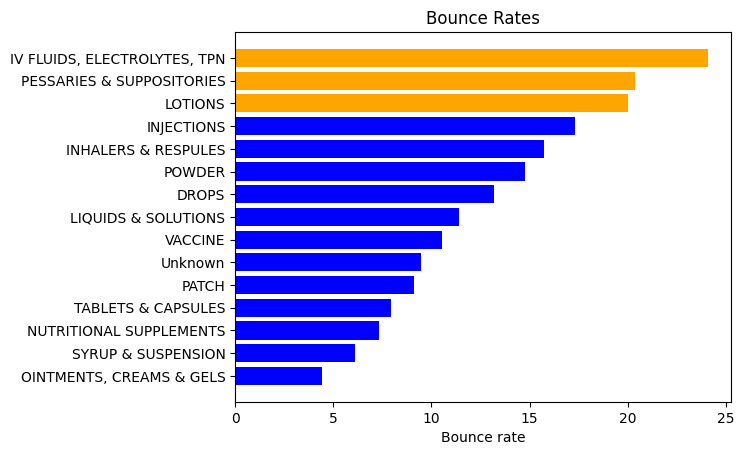

In [100]:
colors = ['orange' if value >= 20 else 'blue' for value in sorted_cat_0['Bounce_rate']]
plt.barh(sorted_cat_0['SubCat'], sorted_cat_0['Bounce_rate'], color=colors)
plt.title('Bounce Rates')
plt.xlabel('Bounce rate')
plt.show()

In [50]:
cleaned_outliers.columns

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')

In [51]:
sub_cat = cleaned_outliers['SubCat'].unique() 
rtn_qty = []
cat = []
for i in sub_cat:
    rtn = cleaned_outliers[cleaned_outliers['SubCat'] == i]['ReturnQuantity'].sum()
    if rtn>0:
        rtn_qty.append(rtn)  
        cat.append(i)

In [52]:
return_qty = pd.DataFrame({'Category':cat, 'ReturnQty':rtn_qty})

In [53]:
return_qty.sort_values(by = 'ReturnQty', ascending = True, inplace = True)

In [54]:
return_qty

,Category,ReturnQty
12,LOTIONS,1
14,PATCH,1
13,VACCINE,2
10,DROPS,7
4,NUTRITIONAL SUPPLEMENTS,8
0,SYRUP & SUSPENSION,14
6,"OINTMENTS, CREAMS & GELS",18
7,PESSARIES & SUPPOSITORIES,21
9,LIQUIDS & SOLUTIONS,29
11,POWDER,50


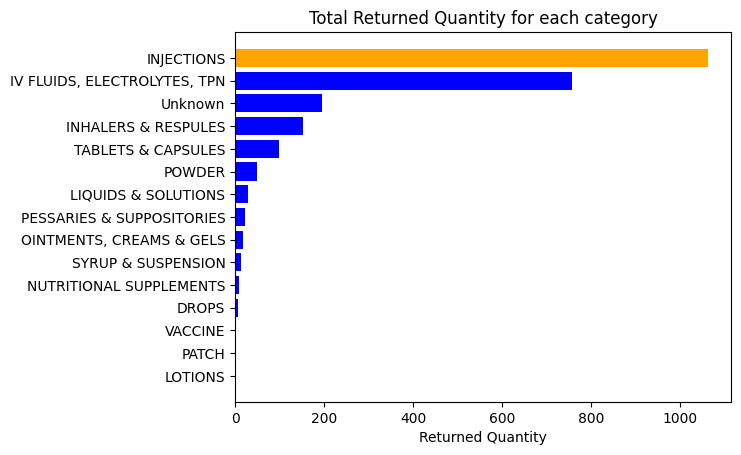

In [101]:
color = ['orange' if value > 1000 else 'blue' for value in return_qty['ReturnQty']]
plt.barh(return_qty['Category'], return_qty['ReturnQty'], color = color)
plt.xlabel("Returned Quantity")
plt.title("Total Returned Quantity for each category")
plt.show()

In [56]:
cleaned_outliers[cleaned_outliers['Typeofsales'] == 'Return'][['Formulation', 'SubCat']].value_counts()

Formulation  SubCat                      
Form1        INJECTIONS                      415
             IV FLUIDS, ELECTROLYTES, TPN    189
Unknown      IV FLUIDS, ELECTROLYTES, TPN    178
             INJECTIONS                      130
             Unknown                         115
Form1        TABLETS & CAPSULES               77
Form2        IV FLUIDS, ELECTROLYTES, TPN     76
Form1        INHALERS & RESPULES              56
Form2        INJECTIONS                       37
Patent       INJECTIONS                       30
Form1        POWDER                           30
             LIQUIDS & SOLUTIONS              20
             OINTMENTS, CREAMS & GELS         15
             SYRUP & SUSPENSION               14
             PESSARIES & SUPPOSITORIES         8
             NUTRITIONAL SUPPLEMENTS           8
Form3        INJECTIONS                        8
Form2        TABLETS & CAPSULES                7
             INHALERS & RESPULES               7
Unknown      TABLETS & CAPS

In [58]:
cost = []
for i in sub_cat:
    cost.append(cleaned_outliers[(cleaned_outliers['Typeofsales'] == 'Return') & 
                     (cleaned_outliers['SubCat'] == i)]['Final_Cost'].sum())

In [64]:
df = pd.DataFrame({'Subcat':sub_cat, 'Cost':cost})
df = df.sort_values(by = 'Cost', ascending = True)

<BarContainer object of 18 artists>

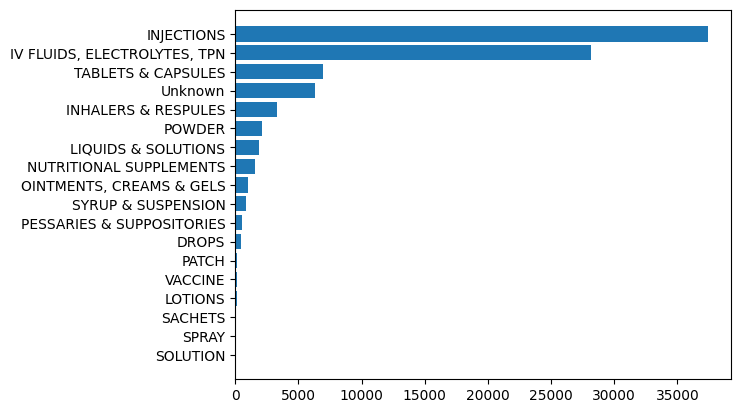

In [65]:
plt.barh(df['Subcat'], df['Cost'])

In [67]:
cleaned_outliers['month'] = cleaned_outliers['Dateofbill'].dt.month_name()

In [68]:
month_qty = cleaned_outliers.groupby(['month'])['ReturnQuantity'].sum()
month = cleaned_outliers['month'].unique()

In [79]:
month

array(['June', 'July', 'March', 'December', 'May', 'January', 'August',
       'October', 'November', 'September', 'February', 'April'],
      dtype=object)

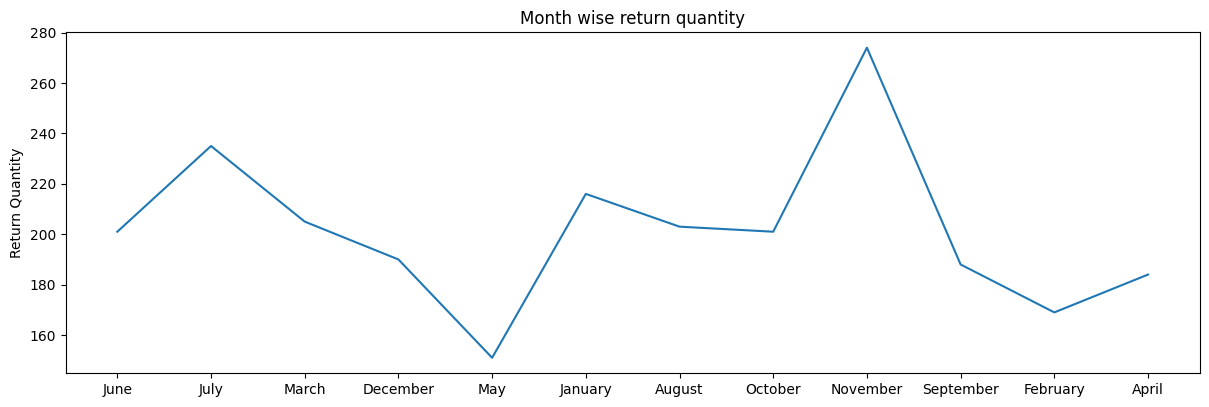

In [78]:
plt.figure(figsize = (12,4))
plt.plot(month, month_qty)
plt.tight_layout()
plt.ylabel("Return Quantity")
plt.title("Month wise return quantity")
plt.show()

In [72]:
def get_month_order(month):
    return {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }[month]

month = cleaned_outliers['month'].unique()
# Sort the month names by numerical order
sorted_months = sorted(month, key=get_month_order)

In [73]:
sorted_months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [87]:
rtn_qty = []
for i in sorted_months:
    rtn_qty.append(cleaned_outliers[cleaned_outliers['month'] == i]['ReturnQuantity'].sum())

In [80]:
total = []
bounced = []
bounce_rates = []
for i in sorted_months:
    t_c = len(cleaned_outliers[cleaned_outliers['month'] == i]['Patient_ID'].unique())
    total.append(t_c)
    b_c = len(cleaned_outliers[(cleaned_outliers['month'] == i) & 
                                       (cleaned_outliers['Typeofsales'] == 'Return')]['Patient_ID'].unique())
    bounced.append(b_c)
    bounce_rates.append((b_c/t_c)*100)

In [81]:
bounce_rates

[17.184265010351968,
 22.03791469194313,
 20.850202429149796,
 20.600858369098713,
 27.004219409282697,
 19.294605809128633,
 21.102661596958175,
 22.099447513812155,
 17.001828153564897,
 18.886679920477135,
 18.88246628131021,
 18.166666666666668]

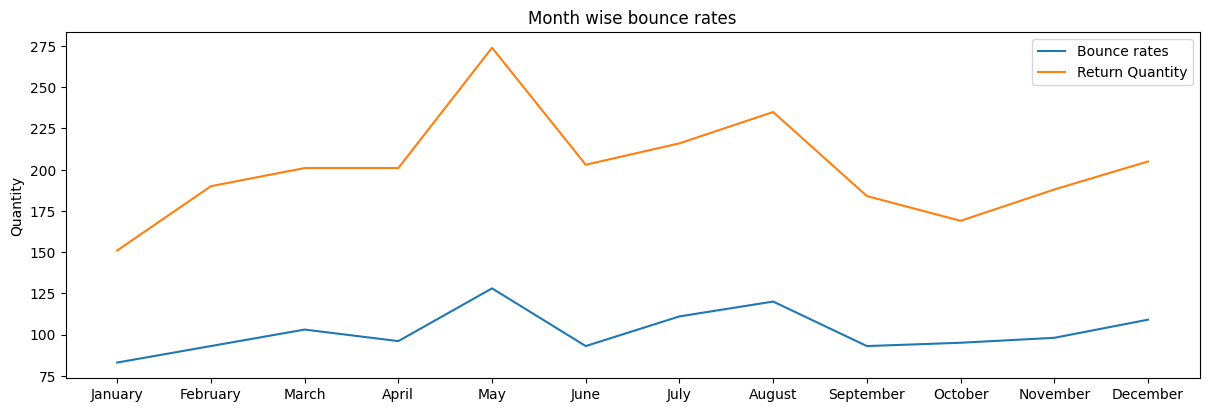

In [92]:
plt.figure(figsize = (12,4))
plt.plot(sorted_months, bounced, label = 'Bounce rates')
plt.plot(sorted_months, rtn_qty, label = 'Return Quantity')
plt.tight_layout()
plt.ylabel("Quantity")
plt.title("Month wise bounce rates and ")
plt.legend()
plt.show()

In [326]:
len(sub_cat)

18

In [83]:
pivot_df = cleaned_outliers.pivot_table(index = 'month', columns = 'SubCat', 
                                        values = 'ReturnQuantity',fill_value = 0, aggfunc = "sum")
pivot_df

SubCat,DROPS,INHALERS & RESPULES,INJECTIONS,"IV FLUIDS, ELECTROLYTES, TPN",LIQUIDS & SOLUTIONS,LOTIONS,NUTRITIONAL SUPPLEMENTS,"OINTMENTS, CREAMS & GELS",PATCH,PESSARIES & SUPPOSITORIES,POWDER,SACHETS,SOLUTION,SPRAY,SYRUP & SUSPENSION,TABLETS & CAPSULES,Unknown,VACCINE
month,,,,,,,,,,,,,,,,,,
April,1,5,105,56,4,0,0,1,0,0,1,0,0,0,0,11,17,0
August,1,10,103,80,1,0,0,1,0,0,10,0,0,0,2,9,18,0
December,0,24,93,46,3,0,0,1,1,0,11,0,0,0,1,9,16,0
February,0,12,76,79,4,0,1,0,0,1,5,0,0,0,1,8,3,0
January,3,13,58,51,5,0,1,1,0,2,1,0,0,0,0,4,12,0
July,0,12,100,61,2,0,0,1,0,0,6,0,0,0,1,12,21,0
June,0,7,87,75,3,0,0,0,0,0,5,0,0,0,0,6,20,0
March,0,9,73,76,3,1,2,1,0,6,2,0,0,0,2,11,15,0
May,1,22,119,86,0,0,2,5,0,6,2,0,0,0,1,7,23,0


In [84]:
sorted_pivot_table_chrono = pivot_df.reindex(pd.to_datetime(pivot_df.index, format='%B').sort_values().strftime('%B'))

In [85]:
sorted_pivot_table_chrono

SubCat,DROPS,INHALERS & RESPULES,INJECTIONS,"IV FLUIDS, ELECTROLYTES, TPN",LIQUIDS & SOLUTIONS,LOTIONS,NUTRITIONAL SUPPLEMENTS,"OINTMENTS, CREAMS & GELS",PATCH,PESSARIES & SUPPOSITORIES,POWDER,SACHETS,SOLUTION,SPRAY,SYRUP & SUSPENSION,TABLETS & CAPSULES,Unknown,VACCINE
month,,,,,,,,,,,,,,,,,,
January,3,13,58,51,5,0,1,1,0,2,1,0,0,0,0,4,12,0
February,0,12,76,79,4,0,1,0,0,1,5,0,0,0,1,8,3,0
March,0,9,73,76,3,1,2,1,0,6,2,0,0,0,2,11,15,0
April,1,5,105,56,4,0,0,1,0,0,1,0,0,0,0,11,17,0
May,1,22,119,86,0,0,2,5,0,6,2,0,0,0,1,7,23,0
June,0,7,87,75,3,0,0,0,0,0,5,0,0,0,0,6,20,0
July,0,12,100,61,2,0,0,1,0,0,6,0,0,0,1,12,21,0
August,1,10,103,80,1,0,0,1,0,0,10,0,0,0,2,9,18,0
September,1,6,103,55,1,0,1,0,0,2,1,0,0,0,3,4,7,0


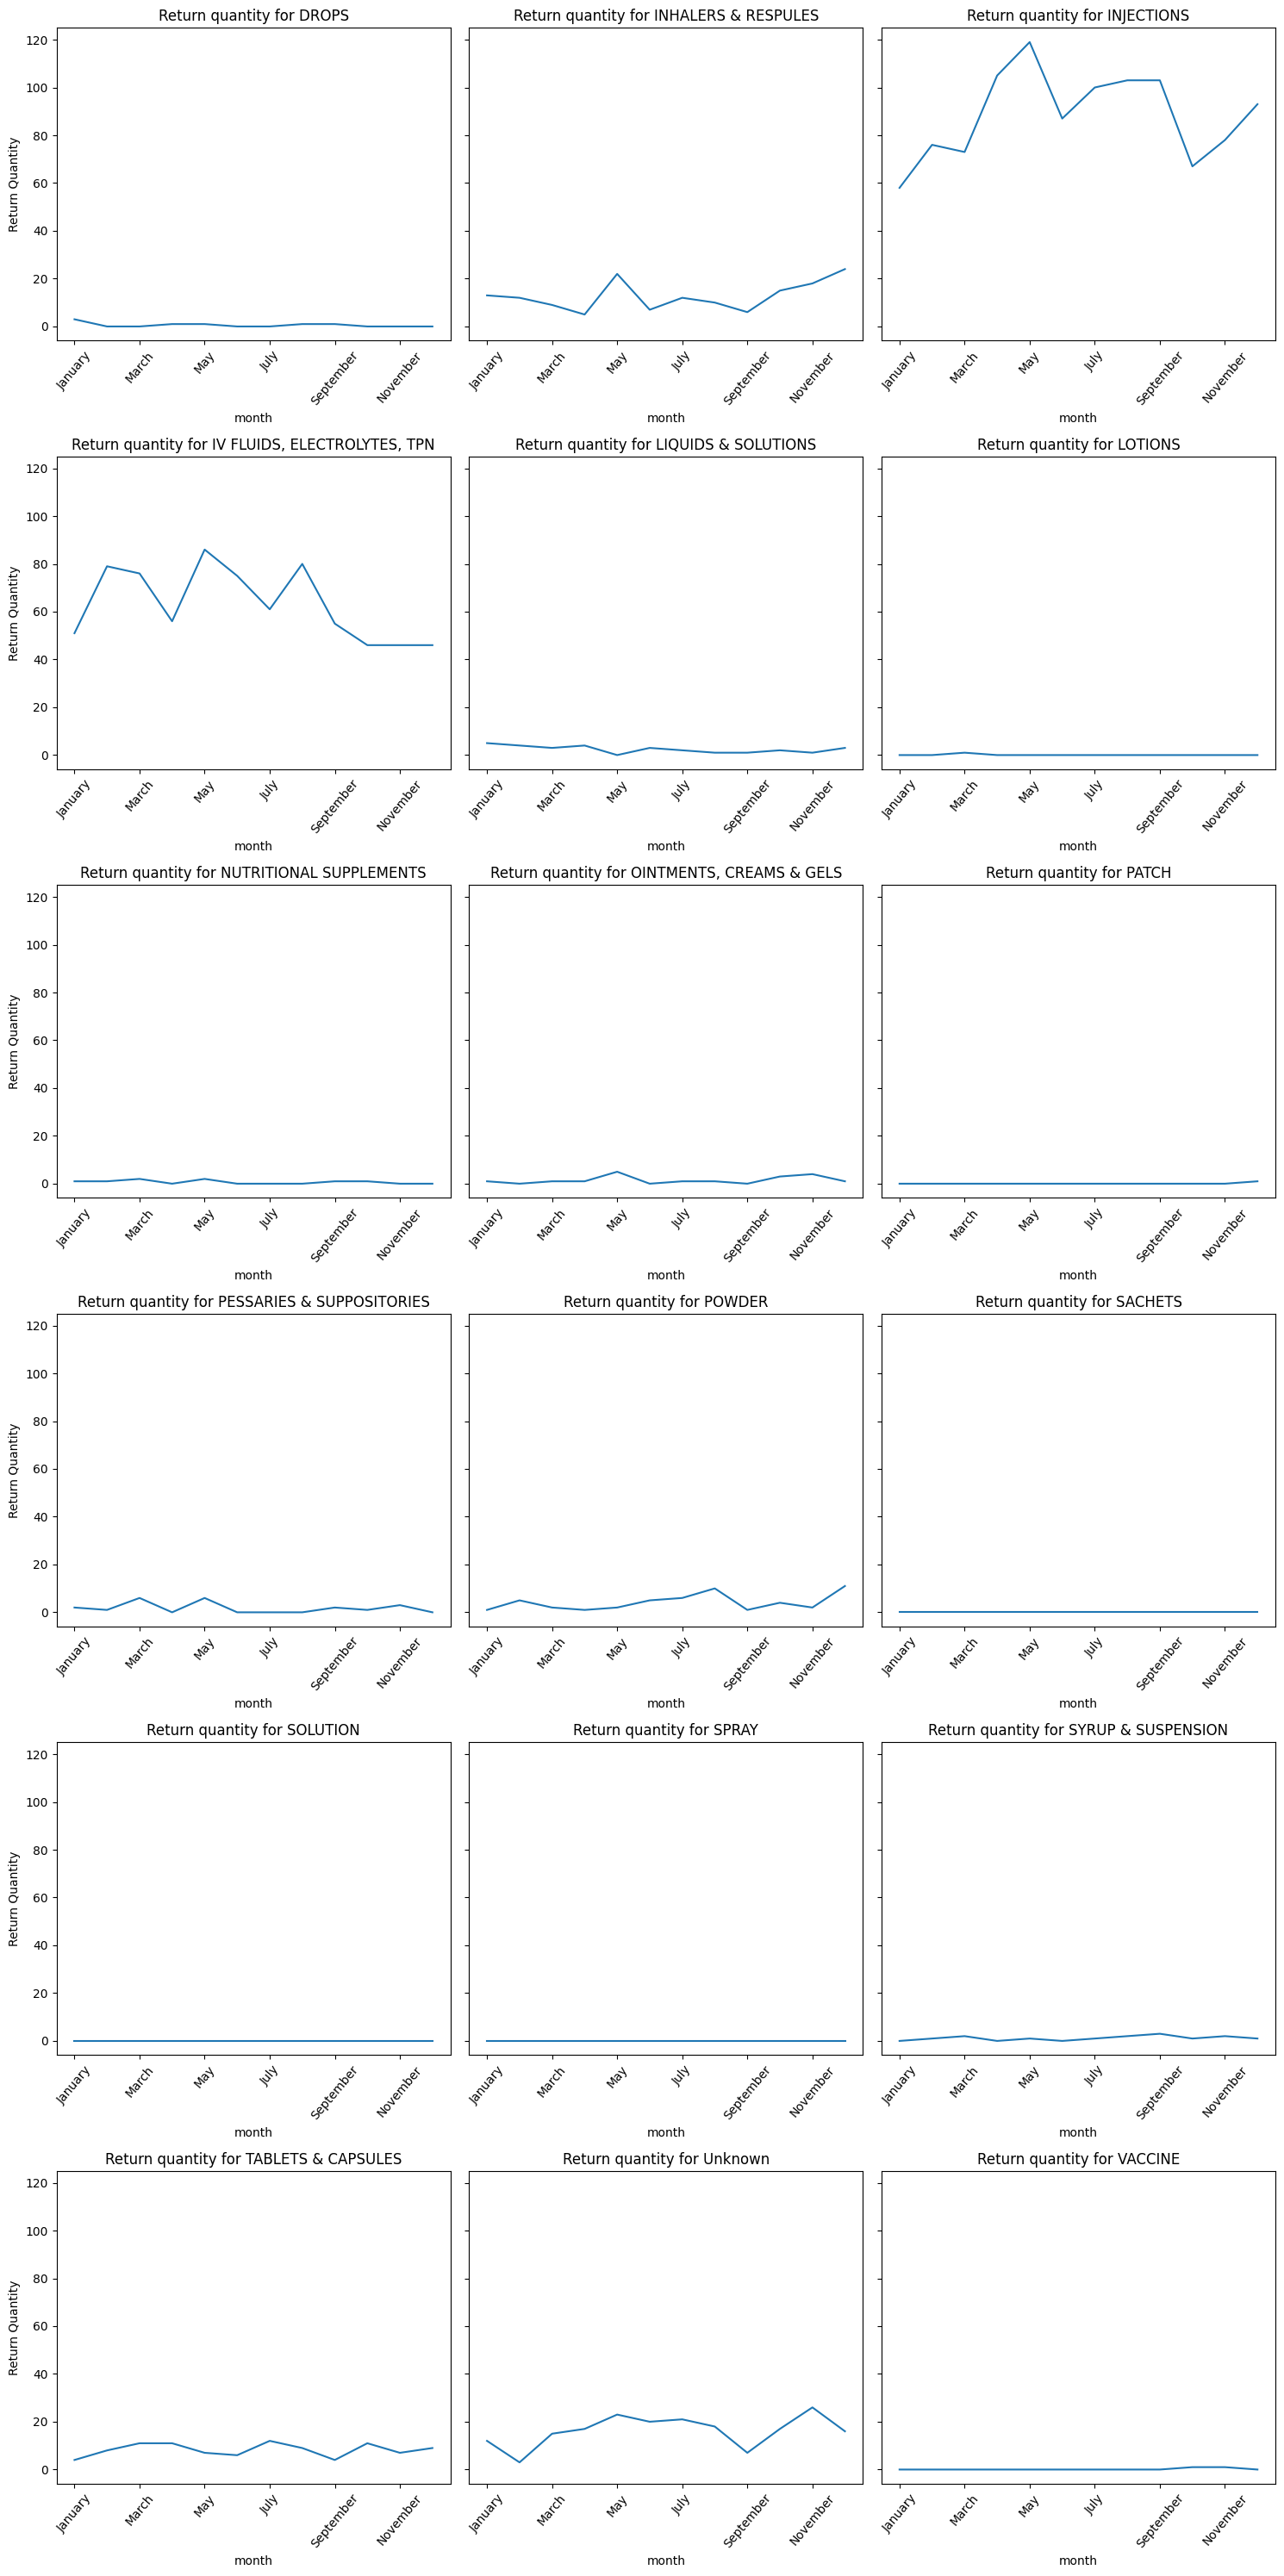

In [102]:
categories = sorted_pivot_table_chrono.columns
n_categories = len(categories)
n_rows = 6
n_cols = (n_categories + n_rows - 1)//n_rows

fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols, 
                         figsize = (5*n_cols, 5*n_rows), sharey = True)

axes = axes.flatten()

for i, (ax, category) in enumerate(zip(axes, categories)):
    sorted_pivot_table_chrono[category].plot(kind = 'line', ax = ax, title=f'Return quantity for {category}', rot = 50)
    ax.set_ylabel('Return Quantity')
    
for ax in axes[n_categories:]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.show()